In [7]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import LeavePOut,cross_val_score
import math

In [8]:
dataset= pd.read_csv("/content/Data_BM.csv")
dataset.head()


,Classlabel,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16
0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
1,1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,0,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,1
3,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1
4,0,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1


In [9]:
X= dataset[["x1","x2","x3","x4","x5","x6","x7","x8","x9","x10","x11","x12","x13","x14","x15","x16"]]
Y= dataset["Classlabel"]

In [10]:
lpo=LeavePOut(p=1)
lpo.get_n_splits(X)


232

In [11]:
dTree = DecisionTreeClassifier()
score = cross_val_score(dTree, X, Y, scoring='accuracy', cv=lpo, n_jobs=-1)
print(f'Scores for each fold are: {score}')
print('Accuracy: %.3f (%.3f)' % (score.mean(), score.std()))

Scores for each fold are: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Accuracy: 0.944 (0.230)


In [12]:
# DECISION TREE MODEL
dTree = DecisionTreeClassifier(criterion="entropy",random_state=40)
score = cross_val_score(dTree, X, Y, scoring='accuracy', cv=lpo, n_jobs=-1)
print(f'Accuracy for each fold are: {score}')
print('Accuracy: %.3f (%.3f)' % (score.mean(), score.std()))
drmean = round(score.mean(),3)
drstd = round(score.std(),3)

Accuracy for each fold are: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Accuracy: 0.944 (0.230)


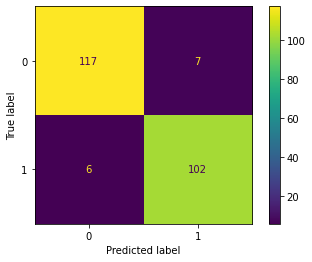

In [13]:
y_pred = cross_val_predict(dTree, X, Y, cv=lpo)
actual=Y
predicted=y_pred
confusion_matrix = metrics.confusion_matrix(actual,predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

In [14]:
TP = confusion_matrix[0,0]
TN = confusion_matrix[1,1]
FP = confusion_matrix[0,1]
FN = confusion_matrix[1,0]
# Accuracy
classification_accuracy = ((TP + TN) / float(TP + TN + FP + FN)*100)

print('Accuracy : {0:0.2f}'.format(classification_accuracy),'%')
# Classification Error
classification_error = ((FP + FN) / float(TP + TN + FP + FN)*100)

print('Classification error : {0:0.2f}'.format(classification_error),'%')
#Recall

recall = (TP / float(TP + FN)*100)

print('Recall : {0:0.2f}'.format(recall),"%")

# Precision
precision = (TP / float(TP + FP)*100)

print('Precision : {0:0.2f}'.format(precision),"%")

# Specificity

specificity = (TN / (TN + FP)*100)

print('Specificity : {0:0.2f}'.format(specificity),'%')
# Sensitivity

Sensitivity = (TP / (TP + FN)*100)

print('Sensitivity : {0:0.2f}'.format(Sensitivity),"%")
# G Mean
gmean = math.sqrt(specificity*Sensitivity)
print('G Mean : {0:0.2f}'.format(gmean),'%')

Accuracy : 94.40 %
Classification error : 5.60 %
Recall : 95.12 %
Precision : 94.35 %
Specificity : 93.58 %
Sensitivity : 95.12 %
G Mean : 94.35 %


In [ ]:
# LOGISTIC REGRESSION

In [16]:
LR = LogisticRegression(solver='liblinear',random_state=0)
score = cross_val_score(LR, X, Y, scoring='accuracy', cv=lpo, n_jobs=-1)
print(f'Scores for each fold are: {score}')
print('Accuracy: %.3f (%.3f)' % (score.mean(), score.std()))
lrmean = round(score.mean(),3)
lrstd = round(score.std(),3)

Scores for each fold are: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Accuracy: 0.957 (0.203)


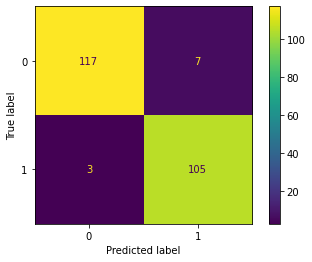

In [17]:
y_pred = cross_val_predict(LR, X, Y, cv=lpo)
actual=Y
predicted=y_pred
confusion_matrix = metrics.confusion_matrix(actual,predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

In [18]:
TP = confusion_matrix[0,0]
TN = confusion_matrix[1,1]
FP = confusion_matrix[0,1]
FN = confusion_matrix[1,0]
# Accuracy
classification_accuracy = ((TP + TN) / float(TP + TN + FP + FN)*100)

print('Accuracy : {0:0.2f}'.format(classification_accuracy),'%')
# Classification Error
classification_error = ((FP + FN) / float(TP + TN + FP + FN)*100)

print('Classification error : {0:0.2f}'.format(classification_error),'%')
#Recall

recall = (TP / float(TP + FN)*100)

print('Recall : {0:0.2f}'.format(recall),"%")

# Precision
precision = (TP / float(TP + FP)*100)

print('Precision : {0:0.2f}'.format(precision),"%")

# Specificity

specificity = (TN / (TN + FP)*100)

print('Specificity : {0:0.2f}'.format(specificity),'%')
# Sensitivity

Sensitivity = (TP / (TP + FN)*100)

print('Sensitivity : {0:0.2f}'.format(Sensitivity),"%")
# G Mean
gmean = math.sqrt(specificity*Sensitivity)
print('G Mean : {0:0.2f}'.format(gmean),'%')

Accuracy : 95.69 %
Classification error : 4.31 %
Recall : 97.50 %
Precision : 94.35 %
Specificity : 93.75 %
Sensitivity : 97.50 %
G Mean : 95.61 %


In [19]:
# Naive Bayes
gnb = GaussianNB()
score = cross_val_score(gnb, X, Y, scoring='accuracy', cv=lpo, n_jobs=-1)
print(f'Scores for each fold are: {score}')
print('Accuracy: %.3f (%.3f)' % (score.mean(), score.std()))
nbmean = round(score.mean(),3)
nbstd = round(score.std(),3)

Scores for each fold are: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Accuracy: 0.948 (0.221)


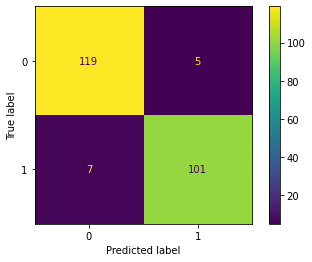

In [20]:
y_pred = cross_val_predict(gnb, X, Y, cv=lpo)
actual=Y
predicted=y_pred
confusion_matrix = metrics.confusion_matrix(actual,predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

In [21]:
TP = confusion_matrix[0,0]
TN = confusion_matrix[1,1]
FP = confusion_matrix[0,1]
FN = confusion_matrix[1,0]
# Accuracy
classification_accuracy = ((TP + TN) / float(TP + TN + FP + FN)*100)

print('Accuracy : {0:0.2f}'.format(classification_accuracy),'%')
# Classification Error
classification_error = ((FP + FN) / float(TP + TN + FP + FN)*100)

print('Classification error : {0:0.2f}'.format(classification_error),'%')
#Recall

recall = (TP / float(TP + FN)*100)

print('Recall : {0:0.2f}'.format(recall),"%")

# Precision
precision = (TP / float(TP + FP)*100)

print('Precision : {0:0.2f}'.format(precision),"%")

# Specificity

specificity = (TN / (TN + FP)*100)

print('Specificity : {0:0.2f}'.format(specificity),'%')
# Sensitivity

Sensitivity = (TP / (TP + FN)*100)

print('Sensitivity : {0:0.2f}'.format(Sensitivity),"%")
# G Mean
gmean = math.sqrt(specificity*Sensitivity)
print('G Mean : {0:0.2f}'.format(gmean),'%')

Accuracy : 94.83 %
Classification error : 5.17 %
Recall : 94.44 %
Precision : 95.97 %
Specificity : 95.28 %
Sensitivity : 94.44 %
G Mean : 94.86 %


In [ ]:
# K Nearest

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn = KNeighborsClassifier(n_neighbors=5)
score = cross_val_score(knn, X, Y, scoring='accuracy', cv=lpo, n_jobs=-1)
print(f'Scores for each fold are: {score}')
print('Accuracy: %.3f (%.3f)' % (score.mean(), score.std()))
knmean = round(score.mean(),3)
knstd = round(score.std(),3)

Scores for each fold are: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Accuracy: 0.922 (0.268)


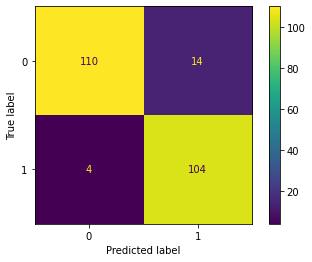

In [24]:
y_pred = cross_val_predict(knn, X, Y, cv=lpo)
actual=Y
predicted=y_pred
confusion_matrix = metrics.confusion_matrix(actual,predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

In [25]:
TP = confusion_matrix[0,0]
TN = confusion_matrix[1,1]
FP = confusion_matrix[0,1]
FN = confusion_matrix[1,0]
# Accuracy
classification_accuracy = ((TP + TN) / float(TP + TN + FP + FN)*100)

print('Accuracy : {0:0.2f}'.format(classification_accuracy),'%')
# Classification Error
classification_error = ((FP + FN) / float(TP + TN + FP + FN)*100)

print('Classification error : {0:0.2f}'.format(classification_error),'%')
#Recall

recall = (TP / float(TP + FN)*100)

print('Recall : {0:0.2f}'.format(recall),"%")

# Precision
precision = (TP / float(TP + FP)*100)

print('Precision : {0:0.2f}'.format(precision),"%")

# Specificity

specificity = (TN / (TN + FP)*100)

print('Specificity : {0:0.2f}'.format(specificity),'%')
# Sensitivity

Sensitivity = (TP / (TP + FN)*100)

print('Sensitivity : {0:0.2f}'.format(Sensitivity),"%")
# G Mean
gmean = math.sqrt(specificity*Sensitivity)
print('G Mean : {0:0.2f}'.format(gmean),'%')

Accuracy : 92.24 %
Classification error : 7.76 %
Recall : 96.49 %
Precision : 88.71 %
Specificity : 88.14 %
Sensitivity : 96.49 %
G Mean : 92.22 %


In [ ]:
# Neural Network

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from keras.metrics.metrics import accuracy

In [27]:
model = Sequential()
model.add(Dense(20, input_shape=(16,)))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))


In [28]:
x_train, x_test, y_train, y_test= train_test_split(X, Y, train_size=0.8)
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

185
185
47
47


In [29]:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                340       
                                                                 
 activation (Activation)     (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


In [30]:
mdl = model.fit(X,Y, epochs=100)

Epoch 1/100
8/8 [==============================] - 1s 2ms/step - loss: 0.3078 - accuracy: 0.3922
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2942 - accuracy: 0.4009
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.2808 - accuracy: 0.4353
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2678 - accuracy: 0.5043
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2561 - accuracy: 0.5560
Epoch 6/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2456 - accuracy: 0.5819
Epoch 7/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2358 - accuracy: 0.6121
Epoch 8/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2275 - accuracy: 0.6853
Epoch 9/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2197 - accuracy: 0.7284
Epoch 10/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2116 - accuracy: 0.7716
Epoch 11/100
8/8 [===========

In [31]:
y_pred = model.predict(x_test)
y_pred

2/2 [==============================] - 0s 4ms/step


array([[0.13851395],
       [0.09225125],
       [0.14816847],
       [0.67044693],
       [0.8409795 ],
       [0.06557927],
       [0.6516713 ],
       [0.5523343 ],
       [0.24443538],
       [0.12403353],
       [0.20314156],
       [0.15333469],
       [0.8964431 ],
       [0.41466266],
       [0.7095817 ],
       [0.7901095 ],
       [0.30174592],
       [0.8964431 ],
       [0.5906924 ],
       [0.07215889],
       [0.5331663 ],
       [0.12232704],
       [0.34724027],
       [0.75966585],
       [0.67641354],
       [0.5128797 ],
       [0.22591928],
       [0.44071692],
       [0.84998167],
       [0.06167072],
       [0.7970911 ],
       [0.7979424 ],
       [0.05833655],
       [0.86623305],
       [0.61317474],
       [0.12232704],
       [0.8409795 ],
       [0.14992201],
       [0.18601443],
       [0.07921859],
       [0.10681304],
       [0.50723034],
       [0.06985949],
       [0.12445167],
       [0.5649583 ],
       [0.87488544],
       [0.8516343 ]], dtype=float3

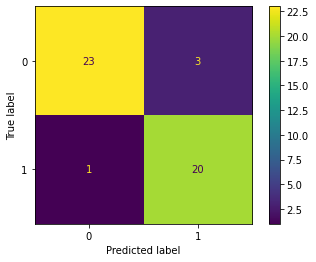

0.9148936170212766


In [32]:
y_pclass = np.where(y_pred>=0.5,1,0)
confusion_matrix = metrics.confusion_matrix(y_test,y_pclass)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()
print(accuracy_score(y_test, y_pclass))
NNmean = round(accuracy_score(y_test, y_pclass))

In [33]:
TP = confusion_matrix[0,0]
TN = confusion_matrix[1,1]
FP = confusion_matrix[0,1]
FN = confusion_matrix[1,0]
# Accuracy
classification_accuracy = ((TP + TN) / float(TP + TN + FP + FN)*100)

print('Accuracy : {0:0.2f}'.format(classification_accuracy),'%')
# Classification Error
classification_error = ((FP + FN) / float(TP + TN + FP + FN)*100)

print('Classification error : {0:0.2f}'.format(classification_error),'%')
#Recall

recall = (TP / float(TP + FN)*100)

print('Recall : {0:0.2f}'.format(recall),"%")

# Precision
precision = (TP / float(TP + FP)*100)

print('Precision : {0:0.2f}'.format(precision),"%")

# Specificity

specificity = (TN / (TN + FP)*100)

print('Specificity : {0:0.2f}'.format(specificity),'%')
# Sensitivity

Sensitivity = (TP / (TP + FN)*100)

print('Sensitivity : {0:0.2f}'.format(Sensitivity),"%")
# G Mean
gmean = math.sqrt(specificity*Sensitivity)
print('G Mean : {0:0.2f}'.format(gmean),'%')

Accuracy : 91.49 %
Classification error : 8.51 %
Recall : 95.83 %
Precision : 88.46 %
Specificity : 86.96 %
Sensitivity : 95.83 %
G Mean : 91.29 %


In [34]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'K Nearest', 'Gaussian Naive Bayes',],'Score': [lrmean, drmean, knmean,  nbmean,],
    'SD': [lrstd, drstd, knstd,  nbstd] })

In [35]:
models.sort_values(by='Score', ascending=False)

,Model,Score,SD
0,Logistic Regression,0.957,0.203
3,Gaussian Naive Bayes,0.948,0.221
1,Decision Tree,0.944,0.230
2,K Nearest,0.922,0.268
